# 时域分析

In [25]:
import pandas as pd 
import numpy as np 
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift, ifft
from scipy.fftpack import fftfreq
import pywt
import pywt.data 

In [19]:
# load data of process1 and process2 
process_signal1 = np.array(pd.read_csv("../data/process signal1.csv"))
process_signal2 = np.array(pd.read_csv("../data/process signal2.csv"))

In [20]:
# fuction to extract time domain feature  
def time_feature_extractor(data):
    """Extract mean value, variance, skewness, peak value, kurtosis, root mean square, peak factor, waveform factor, pulse factor and clearance factor respectively"""
    means_list,vars_list,skews_list,peaks_list,kurts_list,rms_list,peak_facs_list,waveform_facs_list,pulse_facs_list,clearance_facs_list = [],[],[],[],[],[],[],[],[],[]           
    for i in data:
        df_mean = pd.Series(i).mean()
        df_var = pd.Series(i).var()
        df_skew = pd.Series(i).skew()
        df_peak = pd.Series(i).max()
        df_kurt = pd.Series(i).kurt()
        df_rms = math.sqrt(sum([x ** 2 for x in pd.Series(i)]) / 130)
        df_peak_fac = df_peak / df_rms
        df_waveform_fac = df_rms / (abs(pd.Series(i)).mean())
        df_pulse_fac = (max(pd.Series(i))) / (abs(pd.Series(i)).mean())
        #求平方和
        sq_sum=0
        for j in range(130):
            sq_sum+=math.sqrt(abs(i[j]))
        df_clearance_fac = (max(pd.Series(i))) / pow((sq_sum/130),2)
        
        means_list.append(df_mean)
        vars_list.append(df_var) 
        skews_list.append(df_skew)
        peaks_list.append(df_peak)
        kurts_list.append(df_kurt)
        rms_list.append(df_rms)
        peak_facs_list.append(df_peak_fac)
        waveform_facs_list.append(df_waveform_fac)
        pulse_facs_list.append(df_pulse_fac)
        clearance_facs_list.append(df_clearance_fac)
        
    return means_list,vars_list,skews_list,peaks_list,kurts_list,rms_list,peak_facs_list,waveform_facs_list,pulse_facs_list,clearance_facs_list


Text(0.5, 1.0, 'clearance factor signal 2')

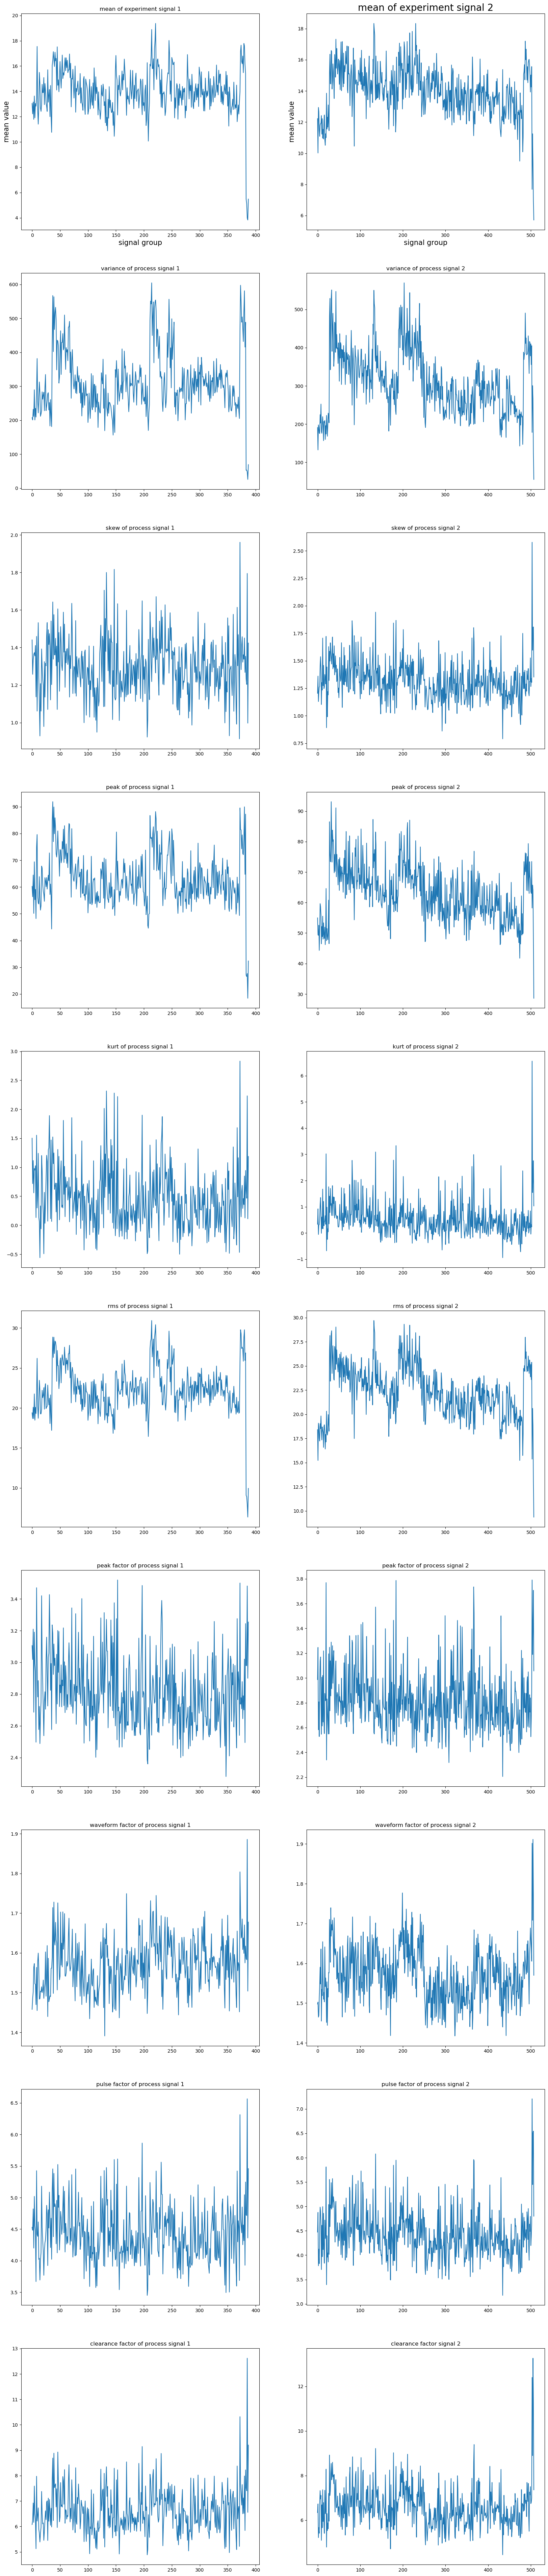

In [21]:
means_list1,vars_list1,skews_list1,peaks_list1,kurts_list1,rms_list1,peak_facs_list1,waveform_facs_list1,pulse_facs_list1,clearance_facs_list1 = time_feature_extractor(process_signal1[:,:130])
means_list2,vars_list2,skews_list2,peaks_list2,kurts_list2,rms_list2,peak_facs_list2,waveform_facs_list2,pulse_facs_list2,clearance_facs_list2 = time_feature_extractor(process_signal2[:,:130])
# Draw time domain feature distribution
fig = plt.figure(figsize=(20,100), dpi=100)
# Check the mean distribution of process 1 and process 2 respectively 
plt.subplot(10,2,1)
plt.plot(means_list1)
plt.title("mean of experiment signal 1")
plt.xlabel("signal group",fontsize = 15)
plt.ylabel("mean value",fontsize = 15)
plt.subplot(10,2,2)
plt.plot(means_list2) 
plt.title("mean of experiment signal 2",fontsize = 20)
plt.xlabel("signal group",fontsize = 15)
plt.ylabel("mean value",fontsize = 15)
# Check the variance distribution of process 1 and process 2 respectively 
plt.subplot(10,2,3)
plt.plot(vars_list1)
plt.title("variance of process signal 1")
plt.subplot(10,2,4)
plt.plot(vars_list2) 
plt.title("variance of process signal 2")
# Check the skewness distribution of process 1 and process 2 respectively
plt.subplot(10,2,5)
plt.plot(skews_list1)
plt.title("skew of process signal 1")
plt.subplot(10,2,6)
plt.plot(skews_list2)  
plt.title("skew of process signal 2")
# View the peak distribution of process 1 and process 2 respectively
plt.subplot(10,2,7)
plt.plot(peaks_list1)
plt.title("peak of process signal 1")
plt.subplot(10,2,8)
plt.plot(peaks_list2)  
plt.title("peak of process signal 2")
# Check the kurtosis distribution of process 1 and process 2 respectively 
plt.subplot(10,2,9)
plt.plot(kurts_list1) 
plt.title("kurt of process signal 1")
plt.subplot(10,2,10) 
plt.plot(kurts_list2)  
plt.title("kurt of process signal 2")
# Check the RMS distribution of process 1 and process 2 respectively
plt.subplot(10,2,11)
plt.plot(rms_list1)
plt.title("rms of process signal 1")
plt.subplot(10,2,12)
plt.plot(rms_list2)  
plt.title("rms of process signal 2")
# Check the peak factor distribution of process 1 and process 2 respectively
plt.subplot(10,2,13)
plt.plot(peak_facs_list1)
plt.title("peak factor of process signal 1")
plt.subplot(10,2,14)
plt.plot(peak_facs_list2)  
plt.title("peak factor of process signal 2")
# Check the waveform factor distribution of process 1 and process 2 respectively 
plt.subplot(10,2,15)
plt.plot(waveform_facs_list1)
plt.title("waveform factor of process signal 1")
plt.subplot(10,2,16)
plt.plot(waveform_facs_list2)  
plt.title("waveform factor of process signal 2")
# Check the pulse factor distribution of process 1 and process 2 respectively
plt.subplot(10,2,17)
plt.plot(pulse_facs_list1)
plt.title("pulse factor of process signal 1")
plt.subplot(10,2,18)
plt.plot(pulse_facs_list2)  
plt.title("pulse factor of process signal 2")
# Check the margin factor distribution of process 1 and process 2 respectively
plt.subplot(10,2,19)
plt.plot(clearance_facs_list1)
plt.title("clearance factor of process signal 1")
plt.subplot(10,2,20)
plt.plot(clearance_facs_list2)  
plt.title("clearance factor signal 2")


综合以上分布图可以看出，时域特征中，均值，rms，波形因子，裕度因子与刀具磨损有比较密切的关系，故选为特征值

# 频域分析 

In [22]:
def get_ps_array(data):
    """Obtain power spectrum"""
    ps_list = []
    num_fft = 130 # Number of sampling points
    for i in data:
        # FFT
        Y = fft(i, num_fft)
        Y = np.abs(Y)
        # Reduce the DC component by N times, and the chord wave component by N / 2 times
        Y[0] = Y[0]/num_fft
        Y[1:] = Y[1:]/(num_fft/2) 
        # power spectrum
        ps = Y**2 / num_fft
        ps = ps[:num_fft//2]
        ps_list.append(ps) 
    ps_array = np.array(ps_list)
    return ps_array

def frequency_features_extractor(ps_array,f):
    """obtain frequency domain features"""
    peak_list,center_list,msf_list,variance_list,energe_list = [],[],[],[],[]
    for i in ps_array:
        # Power spectrum peak
        peak = i.max()
        # Power spectrum center of gravity
        center = ((i*f).sum())/(i.sum())
        # Mean square frequency
        msf = ((np.sqrt(i)*f).sum())/(i.sum())
        # Power spectrum variance
        variance = i.var()
        # Band energy
        energe = i.sum()

        peak_list.append(peak)
        center_list.append(center)
        msf_list.append(msf)
        variance_list.append(variance)
        energe_list.append(energe)
        
    return peak_list,center_list,msf_list,variance_list,energe_list

In [23]:
fs = 10 # sampling frequency
num_fft = 130 # Number of sampling points
df = fs/(num_fft)   # resolving power
# create frequency array
f = [df*n for n in range(0,num_fft)]
f = np.array(f[:num_fft//2])
# Obtain the frequency domain characteristics of process 1 and process 2 respectively
process_signal1_ps = get_ps_array(process_signal1[:,:130])
peak_list1,center_list1,msf_list1,variance_list1,energe_list1 = frequency_features_extractor(process_signal1_ps,f)
process_signal2_ps = get_ps_array(process_signal2[:,:130])
peak_list2,center_list2,msf_list2,variance_list2,energe_list2 = frequency_features_extractor(process_signal2_ps,f)

Text(0.5, 1.0, 'energe of process signal 2')

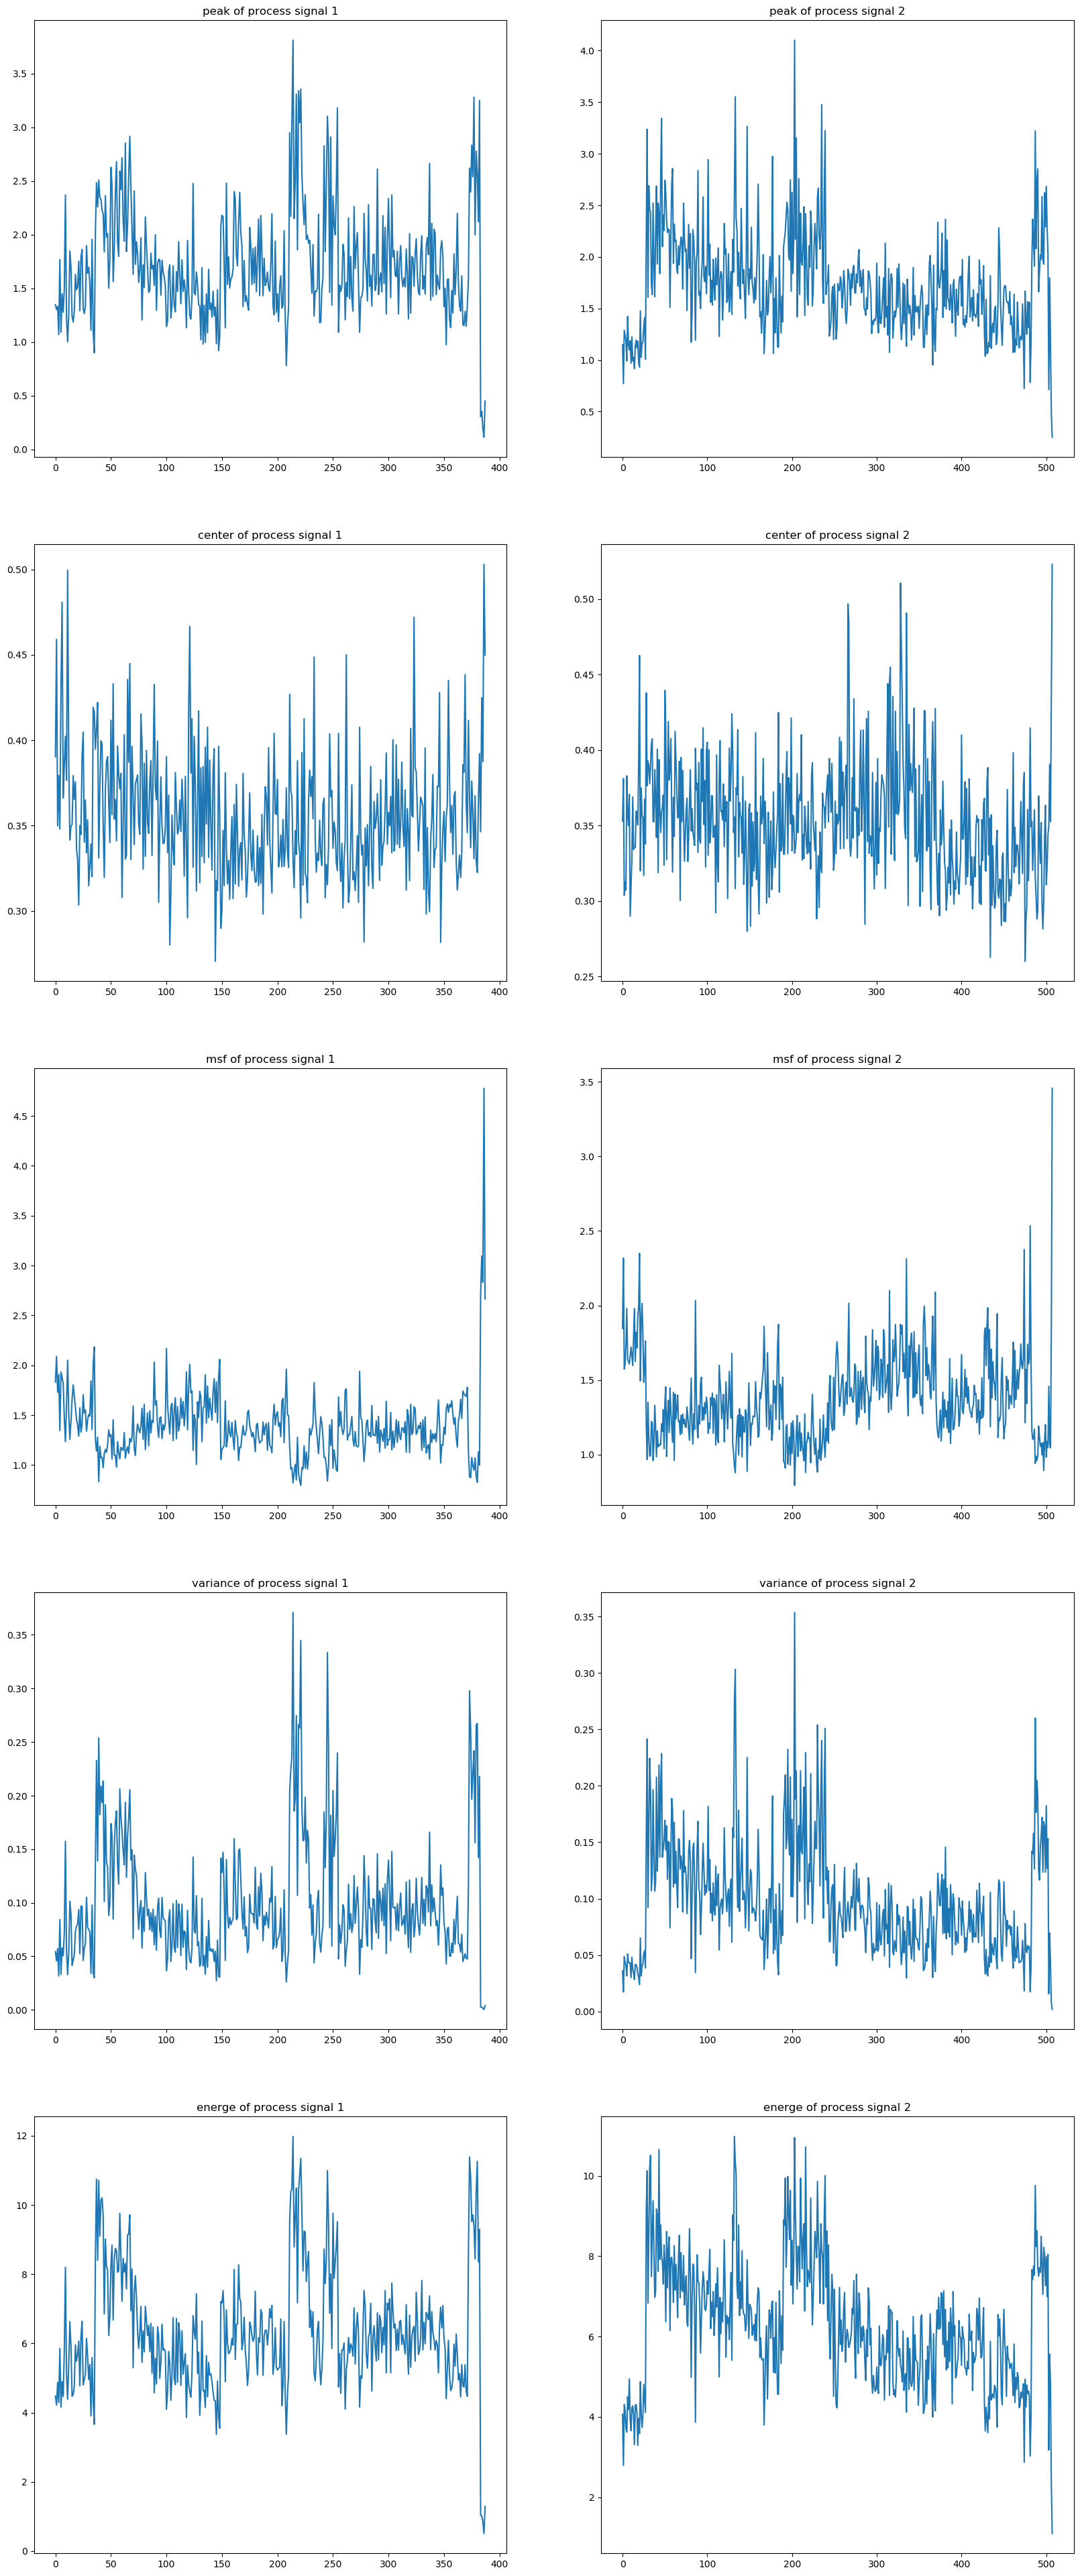

In [24]:
fig = plt.figure(figsize=(20,50), dpi=100)
# Draw the peak distribution of power spectrum of process 1 and process 2 
plt.subplot(5,2,1)
plt.plot(peak_list1)
plt.title("peak of process signal 1")
plt.subplot(5,2,2)
plt.plot(peak_list2) 
plt.title("peak of process signal 2")
# Draw the power spectrum barycenter distribution of process 1 and process 2 respectively
plt.subplot(5,2,3)
plt.plot(center_list1)
plt.title("center of process signal 1")
plt.subplot(5,2,4)
plt.plot(center_list2) 
plt.title("center of process signal 2")
# Plot the mean square frequency distribution of process 1 and process 2 respectively
plt.subplot(5,2,5)
plt.plot(msf_list1)
plt.title("msf of process signal 1")
plt.subplot(5,2,6)
plt.plot(msf_list2) 
plt.title("msf of process signal 2") 
# Plot the power spectrum variance distribution of process 1 and process 2 respectively
plt.subplot(5,2,7)
plt.plot(variance_list1)
plt.title("variance of process signal 1")
plt.subplot(5,2,8)
plt.plot(variance_list2) 
plt.title("variance of process signal 2")
# Plot the frequency band energy distribution of process 1 and process 2 respectively
plt.subplot(5,2,9)
plt.plot(energe_list1)
plt.title("energe of process signal 1")
plt.subplot(5,2,10)
plt.plot(energe_list2) 
plt.title("energe of process signal 2")

从以上频域特征分布图中可以看出，均方频率和功率谱方差与刀具磨损有比较密切的关系，故选为特征值